In [342]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.random as random

In [333]:
color_map = {"s": "blue", "i": "red", "r": "gray"}
options = {
    "node_size": 100,
    "arrowstyle": "-|>",
    "arrowsize": 12
}

In [334]:
beta = 0.50
gamma = 0.50
N = 20
random.seed(1)

In [335]:
G = nx.Graph()
G.add_nodes_from(range(N))
for i in range(len(G.nodes)):
    G.nodes[i]["group"] = "s"
G.nodes[0]["group"] = "i"
G.nodes[0]["recovery_time_left"] = 1
G.nodes.data()

NodeDataView({0: {'group': 'i', 'recovery_time_left': 1}, 1: {'group': 's'}, 2: {'group': 's'}, 3: {'group': 's'}, 4: {'group': 's'}, 5: {'group': 's'}, 6: {'group': 's'}, 7: {'group': 's'}, 8: {'group': 's'}, 9: {'group': 's'}, 10: {'group': 's'}, 11: {'group': 's'}, 12: {'group': 's'}, 13: {'group': 's'}, 14: {'group': 's'}, 15: {'group': 's'}, 16: {'group': 's'}, 17: {'group': 's'}, 18: {'group': 's'}, 19: {'group': 's'}})

In [336]:
# Randomly make edges
for i in range(35):

    # Randomly decide two nodes
    node1 = random.randint(N)
    node2 = random.randint(N)
    while node2 == node1:
        node2 = random.randint(N)
    G.add_weighted_edges_from([(node1, node2, 0)])

In [337]:
for node in G.nodes.data():
    if node[1]["group"] == "i":
        # All other nodes are suspected to be infected!
        for other_node in G.neighbors(node[0]):
            G[node[0]][other_node]["weight"] = beta
G.edges.data()

EdgeDataView([(0, 16, {'weight': 0.5}), (0, 17, {'weight': 0.5}), (0, 1, {'weight': 0.5}), (0, 4, {'weight': 0.5}), (0, 2, {'weight': 0.5}), (1, 12, {'weight': 0}), (2, 15, {'weight': 0}), (3, 6, {'weight': 0}), (3, 17, {'weight': 0}), (3, 9, {'weight': 0}), (4, 9, {'weight': 0}), (4, 17, {'weight': 0}), (4, 7, {'weight': 0}), (5, 11, {'weight': 0}), (5, 15, {'weight': 0}), (5, 18, {'weight': 0}), (5, 19, {'weight': 0}), (6, 18, {'weight': 0}), (6, 8, {'weight': 0}), (7, 13, {'weight': 0}), (7, 9, {'weight': 0}), (7, 8, {'weight': 0}), (8, 12, {'weight': 0}), (8, 17, {'weight': 0}), (9, 11, {'weight': 0}), (9, 13, {'weight': 0}), (9, 19, {'weight': 0}), (10, 11, {'weight': 0}), (10, 15, {'weight': 0}), (11, 12, {'weight': 0}), (13, 19, {'weight': 0}), (13, 16, {'weight': 0}), (14, 18, {'weight': 0}), (15, 18, {'weight': 0})])

In [338]:
G_over_time = []

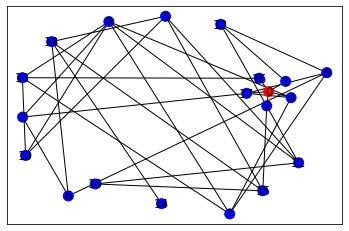

In [339]:
def plot_G(G):
    pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G, pos, node_color = [color_map[G.nodes[i]["group"]] for i in G], **options)
    #nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plot_G(G)

In [340]:
def infect_neighbors(G):
    for node in G.nodes.data():
        if node[1]["group"] == "i" and node[1]["recovery_time_left"] != 1:
            
            # Gives a chance to be infected with all neighbors
            for neighbor in G.neighbors(node[0]):
                if G.nodes[neighbor]["group"] == "s" and random.rand() < beta:
                    # neighbor got infected :(
                    G[node[0]][neighbor]["weight"] = 0
                    G.nodes[neighbor]["group"] = "i"
                    G.nodes[neighbor]["recovery_time_left"] = 1

                    # Updates the neighbors
                    for infected_neighbor in G.neighbors(neighbor):
                        if G.nodes[infected_neighbor]["group"] == "s":
                            G[neighbor][infected_neighbor]["weight"] = beta

def recover_infected(G):
    for node in G.nodes.data():
        if node[1]["group"] == "i":
            # Add to the recovery rate
            node[1]["recovery_time_left"] -= gamma
            
            # Checks if they have recovered
            if node[1]["recovery_time_left"] < 0:
                # They are recovered
                node[1]["group"] = "r"

                # Updates all of the neighbors
                for neighbor in G.neighbors(node[0]):
                    G[node[0]][neighbor]["weight"] = 0

for i in range(10): 

    # Infect new individuals
    infect_neighbors(G)

    # See which infected get recovered
    recover_infected(G)

    G_over_time.append(G.copy())

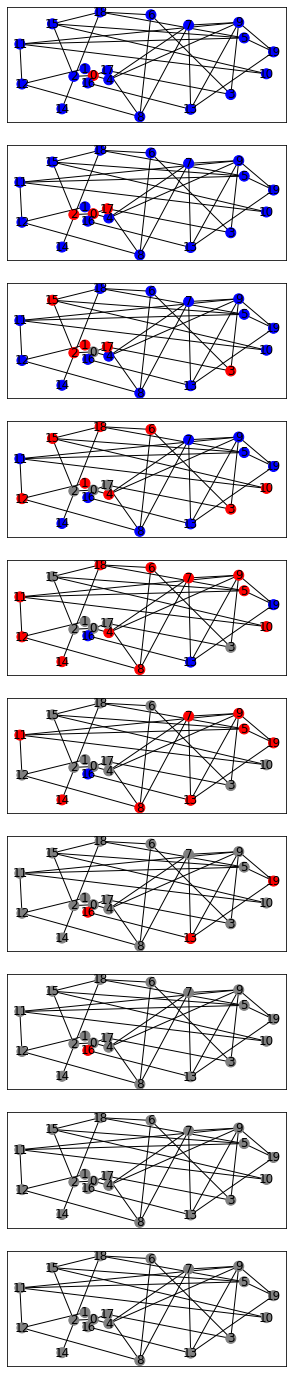

In [341]:
fig, axs = plt.subplots(len(G_over_time), figsize = (5, 25))
pos = nx.spring_layout(G_over_time[0])
for i in range(len(G_over_time)):
    curr_G = G_over_time[i]
    nx.draw_networkx(curr_G, pos, node_color = [color_map[curr_G.nodes[i]["group"]] for i in curr_G], **options, ax = axs[i])

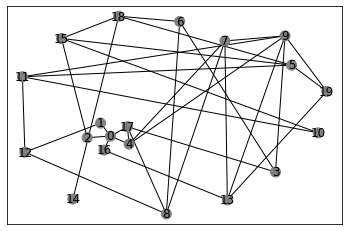

In [361]:
from IPython.display import HTML
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    curr_G = G_over_time[i]
    nx.draw_networkx(curr_G, pos, node_color = [color_map[curr_G.nodes[i]["group"]] for i in curr_G], **options, ax = ax)
ani = FuncAnimation(fig, animate, frames = len(G_over_time), interval = 1000)
HTML(ani.to_jshtml())

In [363]:
nx.adjacency_matrix(G_over_time[0]).todense()

matrix([[0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0.5, 0.5, 0. , 0. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,